In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
pd.options.mode.chained_assignment = None

import warnings

In [2]:
train = pd.read_csv("training_variants.csv") 

In [3]:
train.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
train.shape

(3321, 4)

In [5]:
train.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
dtype: int64

In [6]:
test = pd.read_csv('test_variants.csv')

In [7]:
test.head()

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


In [8]:
test.shape

(5668, 3)

In [9]:
test.isnull().sum()

ID           0
Gene         0
Variation    0
dtype: int64

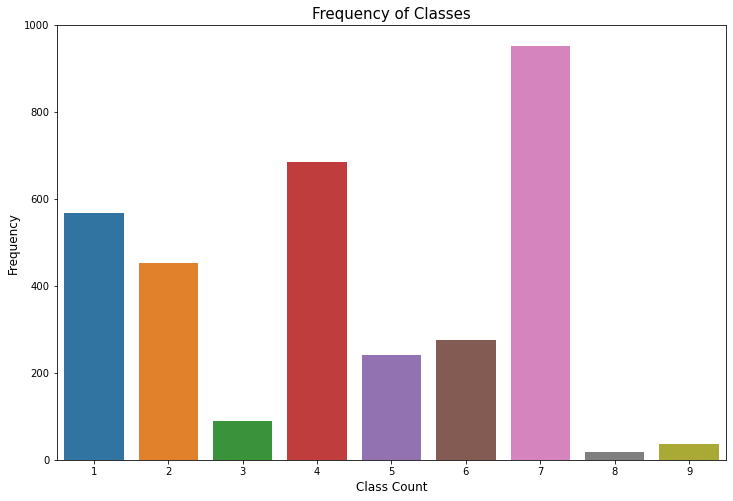

In [10]:
plt.figure(figsize = (12,8))
sns.countplot(x="Class", data=train)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Class Count", fontsize=12)
plt.title('Frequency of Classes', fontsize=15)
plt.show()

<AxesSubplot:>

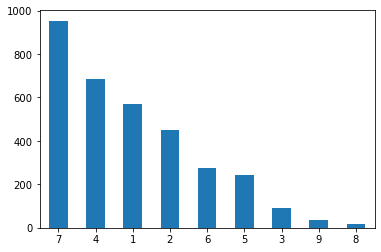

In [11]:
train['Class'].value_counts().plot(kind='bar', rot=0)

In [12]:
train_genes = train.groupby('Gene')['ID'].count().reset_index()
train_genes.head(5)

,Gene,ID
0,ABL1,26
1,ACVR1,3
2,AGO2,5
3,AKT1,28
4,AKT2,11


In [13]:
train_genes = train.groupby('Gene')['ID'].count()

for i in [2, 5, 10, 20, 50, 100, 300]:
    print('Genes that appear less than {} times: {}%'.format(i, round((train_genes < i).mean() * 100, 2)))

Genes that appear less than 2 times: 26.89%
Genes that appear less than 5 times: 53.03%
Genes that appear less than 10 times: 71.59%
Genes that appear less than 20 times: 82.95%
Genes that appear less than 50 times: 95.08%
Genes that appear less than 100 times: 98.11%
Genes that appear less than 300 times: 100.0%


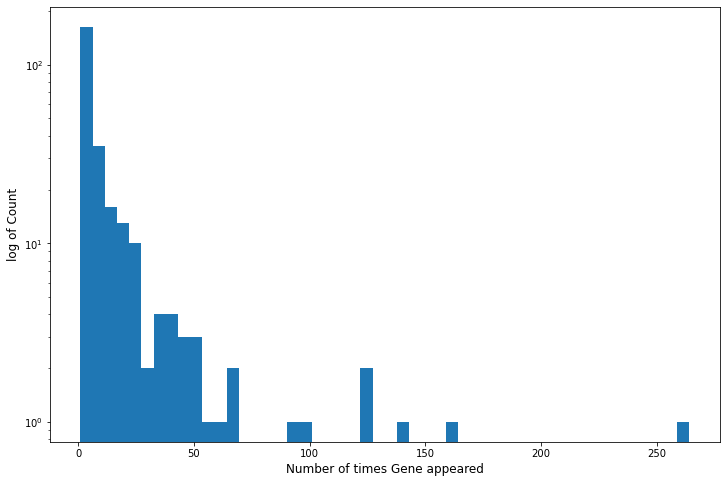

In [14]:
plt.figure(figsize=(12, 8))
plt.hist(train_genes.values, bins=50, log=True)
plt.xlabel('Number of times Gene appeared', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.show()

In [15]:
train_variation = train.groupby('Variation')['Variation'].count()

for i in [2,3,5,50,100]:
    print('Genes that appear less than {} times: {}%'.format(i, round((train_variation < i).mean() * 100, 2)))


Genes that appear less than 2 times: 98.33%
Genes that appear less than 3 times: 99.63%
Genes that appear less than 5 times: 99.83%
Genes that appear less than 50 times: 99.9%
Genes that appear less than 100 times: 100.0%


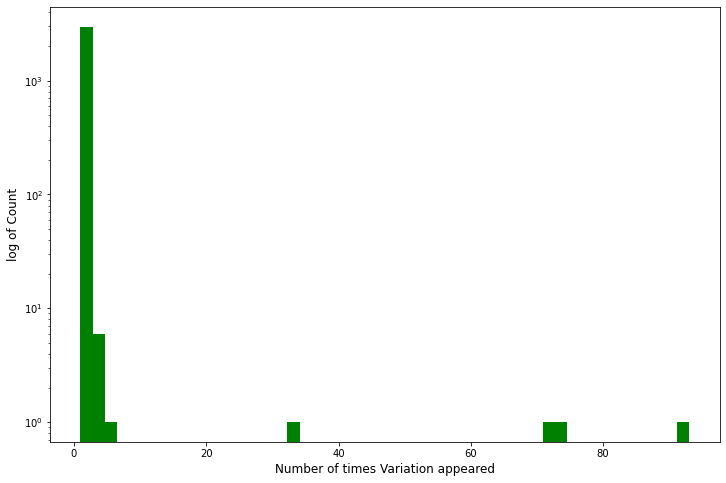

In [16]:
plt.figure(figsize=(12, 8))
plt.hist(train_variation.values, bins=50, log=True, color='green')
plt.xlabel('Number of times Variation appeared', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.show()

In [17]:
train_txt = pd.read_csv('training_text.csv', sep='\|\|', header=None, skiprows=1, names=["ID","Text"])
train_txt.head()

<ipython-input-17-213f73b4a003>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_txt = pd.read_csv('training_text.csv', sep='\|\|', header=None, skiprows=1, names=["ID","Text"])


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [18]:
train_txt.shape

(3321, 2)

In [19]:
train_txt.isnull().sum()
train_txt.dropna().head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [20]:
train = train.merge(train_txt, left_on='ID', right_on = 'ID')
train.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [21]:
train.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [22]:
train_txt['Text'][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

In [23]:
test_txt = pd.read_csv('test_text.csv', sep='\|\|', header=None, skiprows=1, names=["ID","Text"])
test_txt.head()

<ipython-input-23-7aa734ea46c8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_txt = pd.read_csv('test_text.csv', sep='\|\|', header=None, skiprows=1, names=["ID","Text"])


,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [24]:
test_txt.shape

(5668, 2)

In [25]:
test_txt.isnull().sum()
test_txt.dropna().head()

,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [26]:
test_txt['Text'][0]

"2. This mutation resulted in a myeloproliferative phenotype, including erythrocytosis, in a murine model of retroviral bone marrow transplantation.  CONCLUSIONS  JAK2 exon 12 mutations define a distinctive myeloproliferative syndrome that affects patients who currently receive a diagnosis of polycythemia vera or idiopathic erythrocytosis.  The myeloproliferative disorders comprise a spectrum of chronic hematologic diseases that are likely to arise from a mutant multipotent hematopoietic stem cell.1,2 The V617F somatic mutation in the Janus kinase (JAK) 2 gene (JAK2), which causes the substitution of phenylalanine for valine at position 617, has recently been found in the majority of patients with polycythemia vera and in many with essential thrombocythemia or idiopathic myelofibrosis.3-7 This gene encodes a cytoplasmic tyrosine kinase. The mutation, which occurs in the JAK homology 2 (JH2) negative regulatory domain, increases JAK2 kinase activity and causes cytokine-independent growt

In [27]:
test = test.merge(test_txt, left_on='ID', right_on = 'ID')
test.head()

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


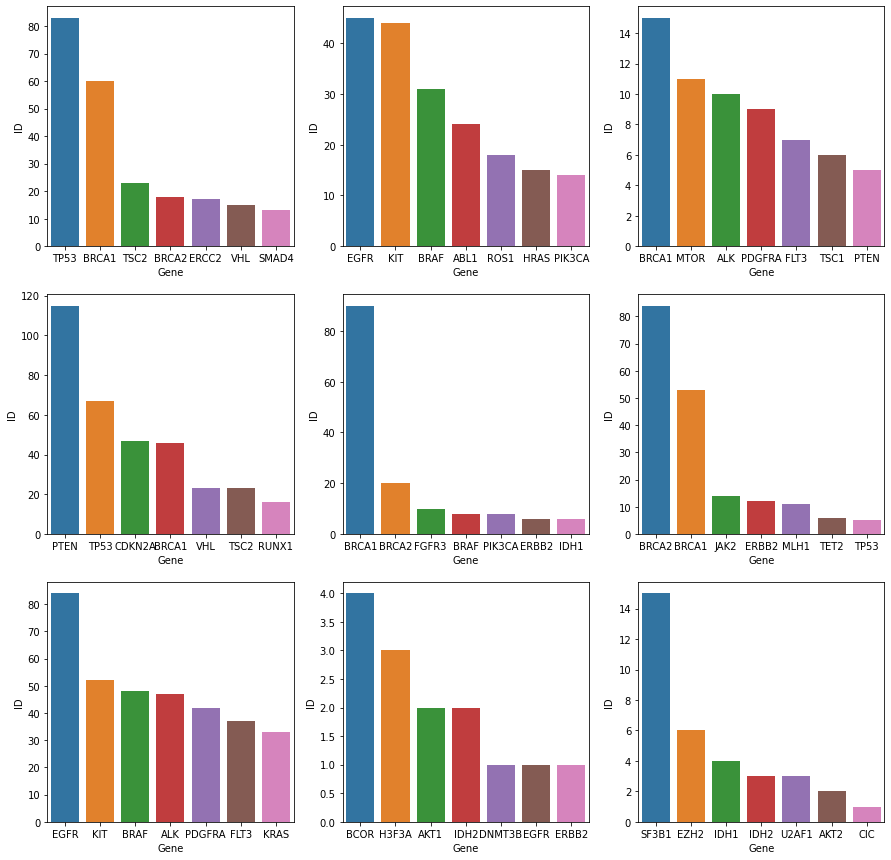

In [28]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        gene_count_grp = train[train["Class"]==((i*3+j)+1)].groupby('Gene')['ID'].count().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('ID', ascending=False)
        sorted_gene_group_top_7 = sorted_gene_group[:7]
        sns.barplot(x="Gene", y="ID", data=sorted_gene_group_top_7, ax=axs[i][j])


In [29]:
class_gene = train.groupby('Gene')['ID'].count().reset_index(name = 'counts')
class_gene.sort_values('counts', ascending = False).head(5)

,Gene,counts
31,BRCA1,264
252,TP53,163
66,EGFR,141
196,PTEN,126
32,BRCA2,125


In [30]:
ad=train[train["Class"]== 1].groupby('Gene')["ID"].count().reset_index(name = 'count')
ad.head()

,Gene,count
0,AGO2,4
1,APC,3
2,AR,2
3,ARID1A,1
4,ARID1B,2


In [31]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

train = standardize_text(train, "Text")

In [32]:
train['Text'][0]

"cyclin dependent kinases (cdks) regulate a variety of fundamental cellular processes  cdk10 stands out as one of the last orphan cdks for which no activating cyclin has been identified and no kinase activity revealed  previous work has shown that cdk10 silencing increases ets2 (v ets erythroblastosis virus e26 oncogene homolog 2) driven activation of the mapk pathway, which confers tamoxifen resistance to breast cancer cells  the precise mechanisms by which cdk10 modulates ets2 activity, and more generally the functions of cdk10, remain elusive  here we demonstrate that cdk10 is a cyclin dependent kinase by identifying cyclin m as an activating cyclin  cyclin m, an orphan cyclin, is the product of fam58a, whose mutations cause star syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations  we show that star syndrome associated cyclin m mutants are unable to interact with cdk10  cyclin m silencing phenocopies cdk1

In [33]:
#from sklearn.model_selection import train_test_split
#train1, validation = train_test_split(train, test_size=0.3, random_state=8, stratify=train['Class'])
#train1.shape

In [34]:
train1=train
train1.isnull().sum()
train1 = train1.dropna()

In [35]:
train1.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
Text         0
dtype: int64

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
#with open('train.pickle', 'wb') as handle:
    #pickle.dump(train, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [38]:
def Vectorize_text(text, max_features=250, ngram_range=(1, 2), min_df=1):
    X_vect = list(text)
    tfidf = TfidfVectorizer(min_df=min_df, ngram_range=ngram_range, max_features=max_features)
    X_vect = pd.DataFrame(tfidf.fit_transform(X_vect).toarray(), index=text.index)      
    return X_vect

In [39]:
tfidf_features = Vectorize_text(train1['Text'])

In [40]:
tfidf_features.shape

(3316, 250)

In [41]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, n_iter=5, random_state=0)
truncated_tfidf = svd.fit_transform(tfidf_features)
df_tfidf_col_name = ["tfidf_"+str(i) for i in range(50)]
df_tfidf = pd.DataFrame(truncated_tfidf)
df_tfidf.columns = df_tfidf_col_name

In [42]:
df_tfidf[:4]

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49
0,0.940366,-0.048190,-0.013484,-0.008952,0.019087,-0.002923,-0.091751,-0.049546,-0.075537,-0.083029,...,-0.002047,0.035418,-0.022645,0.028806,0.064640,-0.006341,0.000322,0.004052,0.039023,0.035752
1,0.936224,-0.110573,-0.041343,0.112644,0.081256,-0.031362,0.093390,0.023405,-0.049074,-0.064044,...,0.090759,-0.022016,0.083919,0.038041,0.005428,-0.028654,-0.011590,0.015764,0.030417,-0.017893
2,0.936224,-0.110573,-0.041343,0.112644,0.081256,-0.031362,0.093390,0.023405,-0.049074,-0.064044,...,0.090759,-0.022016,0.083919,0.038041,0.005428,-0.028654,-0.011590,0.015764,0.030417,-0.017893
3,0.944262,-0.081851,-0.031383,0.079750,0.022240,0.007678,-0.083073,0.009421,0.014039,-0.064470,...,-0.005782,-0.002507,-0.009851,0.026243,-0.029328,-0.022507,0.022971,-0.022056,0.029327,-0.001111


In [44]:
import multiprocessing
import nltk
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vimalmailbook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
train.isnull().sum()
train = train.dropna()

In [50]:
def read_text(column_name):
    return gensim.utils.simple_preprocess(str([column_name]).encode('utf-8'))

In [51]:
documents=[]
for i in range(len(train.Text)):
    documents.append(read_text(train["Text"]))

In [48]:
final = [word for word in documents if not word in stopwords.words()]

In [52]:
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(final)
model.train(sentences=documents, total_examples=len(final), epochs=model.iter)

<ipython-input-52-e61326468c21>:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  model.train(sentences=documents, total_examples=len(final), epochs=model.iter)


(291459, 1110860)

In [53]:
model.most_similar('canc')

<ipython-input-53-204c4f2d988b>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('canc')


[('background', 0.8061501979827881),
 ('non', 0.8042572736740112),
 ('small', 0.8008677363395691),
 ('cell', 0.7681422233581543),
 ('lung', 0.7631731629371643),
 ('abstract', 0.7624196410179138),
 ('kinases', 0.7069424390792847),
 ('cyclin', 0.6824865937232971),
 ('cdks', 0.681210994720459),
 ('dependent', 0.6807386875152588)]

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(analyzer="word", tokenizer=nltk.word_tokenize,preprocessor=None, stop_words='english', max_features=None)
bag_of_words = count_vectorizer.fit_transform(train['Text'])

In [55]:
len(count_vectorizer.get_feature_names())

160212

In [56]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_bag_of_words = svd.fit_transform(bag_of_words) 

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import scikitplot.plotters as skplt
def evaluate_features(X, y, clf=None):
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    skplt.plot_confusion_matrix(y, preds)

E:\Anac\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished
E:\Anac\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


Log loss: 2.494146536414232
Accuracy: 0.3525331724969843


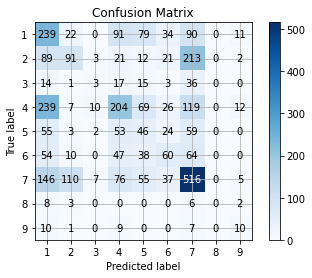

In [64]:
evaluate_features(truncated_bag_of_words, train['Class'])

In [65]:
train['Class'].shape

(3316,)

E:\Anac\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.6s finished
E:\Anac\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


Log loss: 1.5932084967827265
Accuracy: 0.42249698431845595


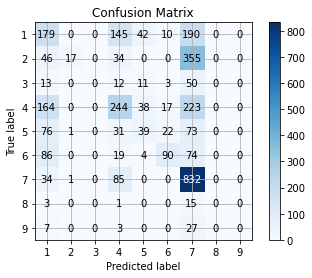

In [66]:
from sklearn.ensemble import RandomForestClassifier
evaluate_features(truncated_bag_of_words, train['Class'], 
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))

E:\Anac\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.2s finished
E:\Anac\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


Log loss: 1.5787658691170154
Accuracy: 0.4351628468033776


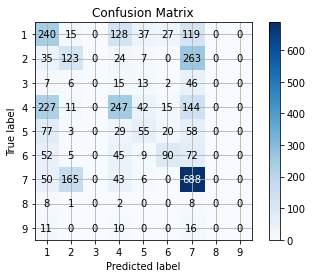

In [67]:
evaluate_features(df_tfidf, train['Class'])

E:\Anac\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.3s finished
E:\Anac\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


Log loss: 1.6358186307486253
Accuracy: 0.39806996381182147


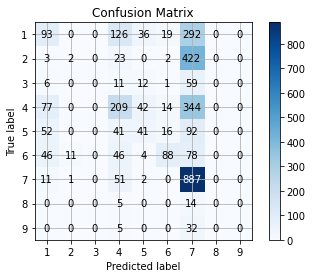

In [68]:
evaluate_features(df_tfidf, train['Class'], 
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))

In [ ]:
len(df_tfidf)